**Ссылка на датасет**

https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset


**Содержательная постановка задачи**

---



Изучение поведенческих паттернов клиентов и прогнозирование оттока в сети телекоммуникационной компании на основе агрегированных данных за первые 9 месяцев. Задача заключается в кластеризации клиентов на основе их поведения и характеристик за первые 9 месяцев с целью выявления сегментов клиентов с высоким риском оттока. Кластеризация будет осуществляться с использованием данных о количестве неудачных звонков, частоте отправки SMS, количестве жалоб, числе уникальных звонков, длительности подписки, возрастной группе, сумме оплаты, типе услуги, продолжительности использования и общей стоимости клиента. Целевой переменной будет значение оттока клиента, определенное по его статусу на конец 12 месяца. После кластеризации необходимо будет построить модель логистической регрессии для предсказания значения оттока клиентов на основе имеющихся данных.


**Значение факторов**

---



***Anonymous Customer ID***: идентификатор клиента
Call Failure: количество отклоненных вызовов

Клиенты, которые часто отклоняют вызовы, могут быть не удовлетворены качеством обслуживания или услуг. Этот показатель может указывать на возможные проблемы с сетью, качеством связи или некорректным обслуживанием. Такие клиенты могут быть склонны к оттоку. Количество отклоненных вызовов также может быть связано с активностью клиента и его использованием услуг компании. Например, клиенты, которые редко отвечают на вызовы, могут быть менее заинтересованы в услугах компании и, следовательно, более склонны к оттоку.

***Complains:*** двоичный (0: Жалоб нет, 1: жалобы есть)

Клиенты, которые подают жалобы, могут быть не удовлетворены качеством предоставляемых услуг или обслуживания. Это может быть связано с проблемами сети, некорректным выставлением счетов, недостаточным качеством обслуживания клиентов и т. д. Такие клиенты вероятно имеют повышенный риск оттока.

***Subscription Length:*** общее количество месяцев подписки

Клиенты, которые длительное время остаются подписчиками, часто считаются более лояльными и стабильными. Они могут иметь устойчивые привычки использования услуг компании и более высокий уровень удовлетворенности. Такие клиенты могут образовывать кластеры с низким риском оттока.

***Charge Amount:*** Сумма платежа - порядковая переменная (0: наименьшая сумма, 9: наибольшая сумма)

Клиенты, которые регулярно платят более высокие суммы, могут быть более лояльными компании и более привязанными к ее услугам. Высокие платежи могут свидетельствовать о высокой оценке услуг и возможности для компании предоставить дополнительные услуги или продукты, что может способствовать удержанию клиентов.

***Seconds of Use:*** общее количество звонков в секундах

***Frequency of use:*** общее количество звонков

Общее количество звонков также может указывать на уровень удовлетворенности клиента качеством обслуживания. Если клиенты часто обращаются за поддержкой или помощью, это может свидетельствовать о проблемах, которые они испытывают с услугами или обслуживанием, что может увеличить вероятность оттока.

***Frequency of SMS:*** общее количество текстовых сообщений

Исходящие текстовые сообщения могут включать в себя информационные уведомления о новых услугах, акциях, скидках и специальных предложениях. Если клиенты воспринимают эти сообщения положительно и находят в них ценность, они могут быть более склонны оставаться клиентами компании.

***Distinct Called Numbers:*** общее количество отдельных телефонных звонков
Age Group: порядковая переменная (1: младший возраст, 5: старший возраст)

Возраст клиентов может влиять на отток клиентов, поскольку молодые люди чаще ищут более качественные и менее дорогостоящие услуги. Это объясняется тем, что объем общения, использования интернета и других услуг у них выше, чем у клиентов другого возраста.

***Tariff Plan:*** бинарный (1: Оплата по мере поступления, 2: контрактный)

Фактор тарифного плана может влиять на отток клиентов, потому что использование различных тарифных планов влияет на удовлетворённость клиента и на доходность компании.

***Status:*** Статус - бинарный (1: активный, 2: неактивный)

Фактор «статус» может влиять на отток клиентов, потому что от него зависит, насколько часто клиент использует услуги компании. Если клиент неактивен в течение длительного времени, это может быть признаком того, что он начал использовать услуги конкурентов или альтернативные продукты.

***Age:*** Возраст клиента

***Churn:*** бинарный (1: отток, 0: отсутствие оттока) - Метка класса

***Customer Value:*** Рассчитанная ценность клиента

In [ ]:
import pandas as pd
import seaborn as sn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
df = pd.read_csv('dz-data.csv', sep=';', decimal=',', index_col='Column1')

In [ ]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn
Column1,,,,,,,,,,,
1144,0.000000,0,0.275,0.0,0.097046,0.066496,0.186667,0.25,0,0,0
509,0.100000,0,0.775,0.0,0.308017,0.000000,0.133333,0.50,0,0,0
2198,0.333333,0,0.150,0.6,0.206751,0.580563,0.186667,0.50,0,0,0
2645,0.566667,0,0.300,0.0,0.578059,0.181586,0.386667,0.25,1,0,0
442,0.266667,0,0.375,0.0,0.101266,0.020460,0.106667,0.25,0,0,0


In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers',
       'Age Group', 'Tariff Plan', 'Status', 'Churn'],
      dtype='object')

<Axes: >

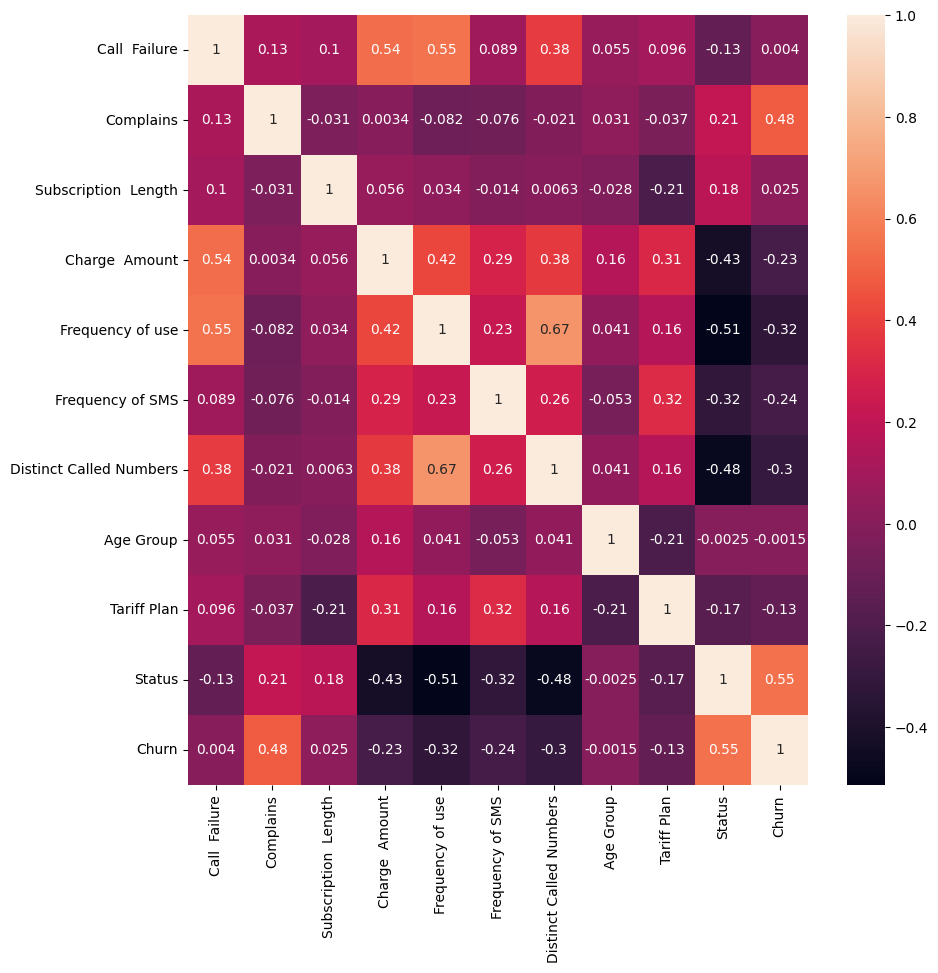

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(df.corr(), annot=True)

**Упрощение анализа**

---



Фактор ***Customer Value*** является производной от остальных факторов, в связи с чем данный фактор не будет использоваться в дальнейшем для решения поставленной задачи.

Нет необходимости отслеживать точный возраст клиента, поэтому вместо фактора ***Age*** будет достаточно использовать только фактор ***Age group***, так как разделение клиентов на группы по возрасту упрощает анализ данных, делая его более понятным и доступным для интерпретации. Дополнительно стоит отметить, что определение групп возрастов позволяет лучше понять поведенческие и потребительские тенденции в различных возрастных категориях, что полезно при принятии решений о маркетинге и стратегии удержания клиентов.

Также наблюдается высокая корреляция между факторами ***Seconds of Use*** и ***Frequency of use***. Использование количества звонков предоставляет информацию о частоте взаимодействия с телекоммуникационным сервисом. Это помогает понять, насколько часто клиенты взаимодействуют с сервисом, что может свидетельствовать о их уровне удовлетворенности или зависимости от сервиса. Количество звонков может быть полезно для сегментации клиентов на основе их коммуникационных привычек. Например, клиенты с большим количеством звонков могут принадлежать к другому сегменту по сравнению с теми, у кого звонков меньше, и такая сегментация может дать представление о различных поведенческих особенностях и предпочтениях клиентов.Исходя из вышеописанного следует использовать фактор ***Frequency of use***, а ***Seconds of Use*** рассматривать в дальнейшем нет необходимости.

***Distinct Called Numbers*** отражает то же самое, что и ***Frequency of Use***, поэтому в анализе не учитывается.

<Axes: xlabel='Frequency of use', ylabel='Count'>

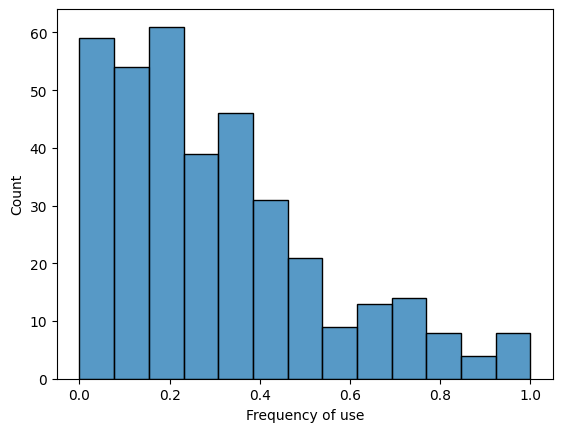

In [ ]:
sn.histplot(df['Frequency of use'])

<Axes: xlabel='Call  Failure', ylabel='Count'>

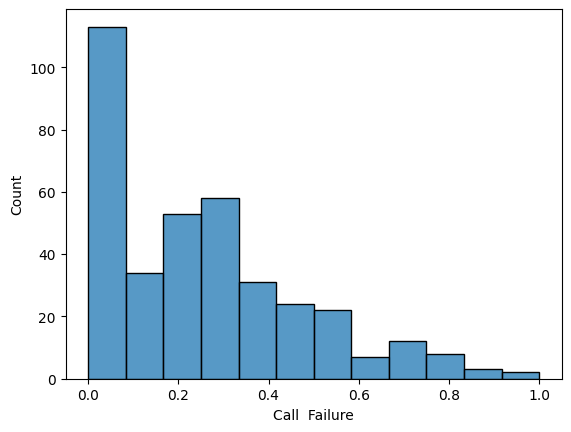

In [ ]:
sn.histplot(df['Call  Failure'])

<Axes: xlabel='Complains', ylabel='Count'>

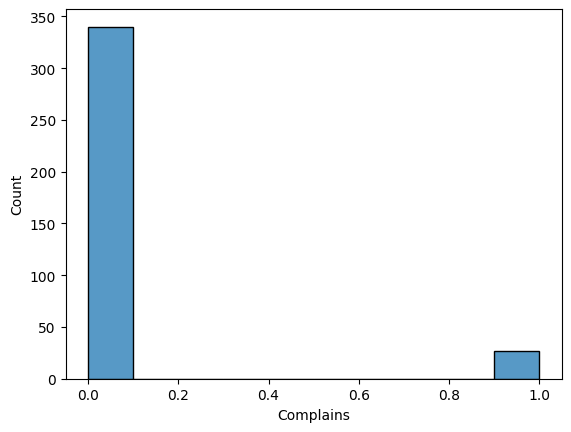

In [ ]:
sn.histplot(df['Complains'])

<Axes: xlabel='Subscription  Length', ylabel='Count'>

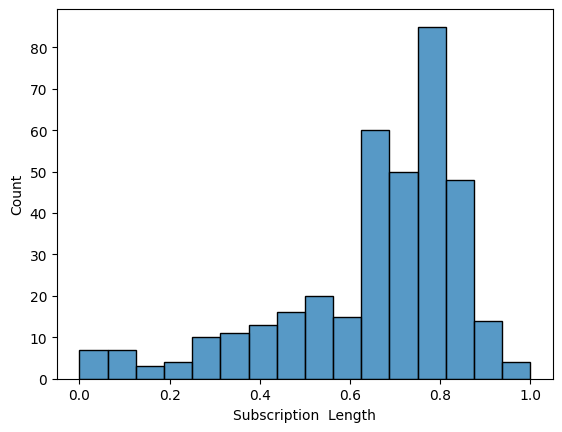

In [ ]:
sn.histplot(df['Subscription  Length'])

<Axes: xlabel='Charge  Amount', ylabel='Count'>

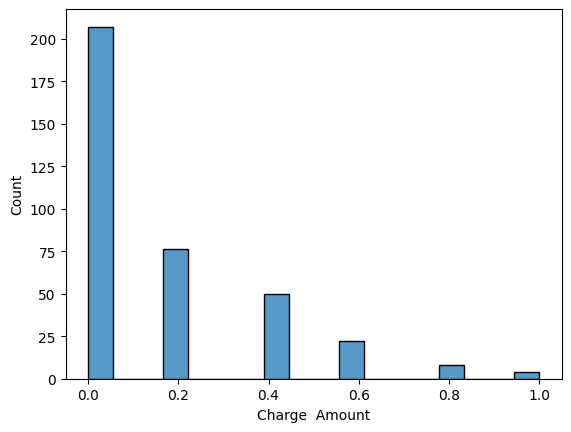

In [ ]:
sn.histplot(df['Charge  Amount'])

<Axes: xlabel='Frequency of use', ylabel='Count'>

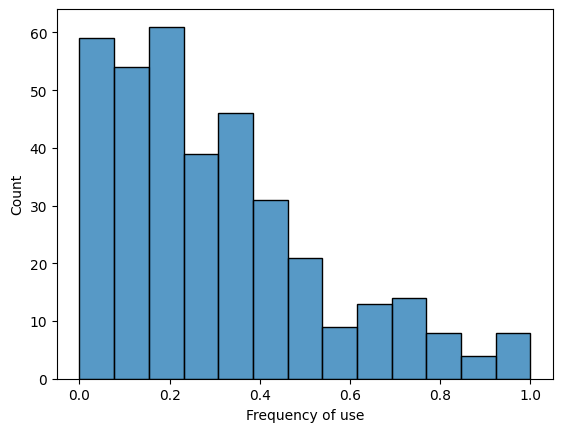

In [ ]:
sn.histplot(df['Frequency of use'])

<Axes: xlabel='Frequency of SMS', ylabel='Count'>

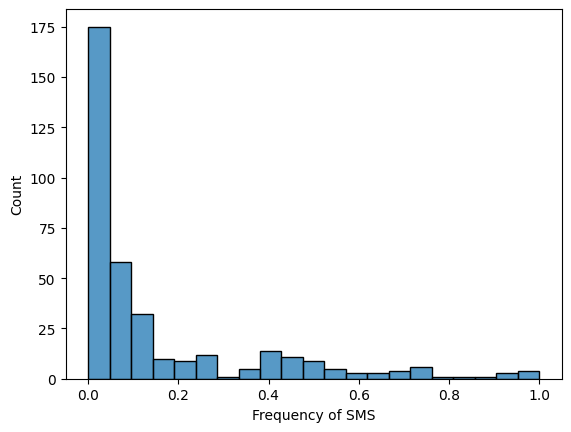

In [ ]:
sn.histplot(df['Frequency of SMS'])

<Axes: xlabel='Distinct Called Numbers', ylabel='Count'>

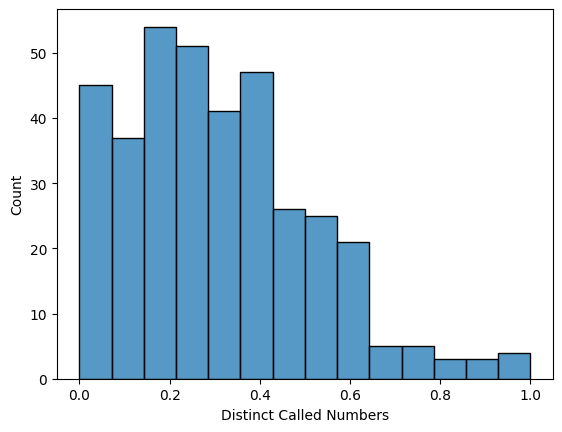

In [ ]:
sn.histplot(df['Distinct Called Numbers'])

<Axes: xlabel='Age Group', ylabel='Count'>

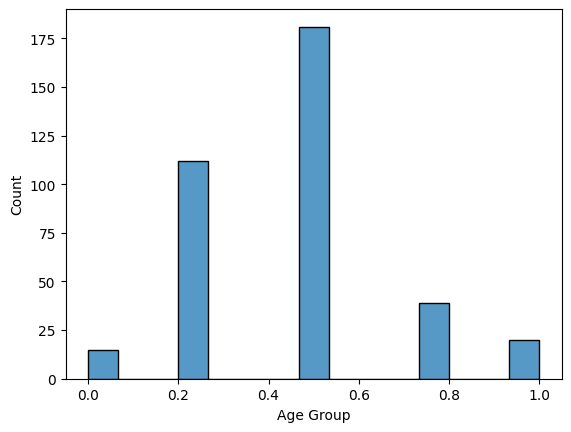

In [ ]:
sn.histplot(df['Age Group'])

<Axes: xlabel='Tariff Plan', ylabel='Count'>

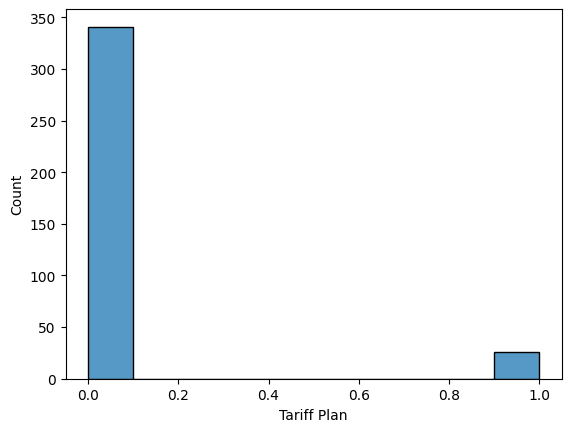

In [ ]:
sn.histplot(df['Tariff Plan'])

<Axes: xlabel='Status', ylabel='Count'>

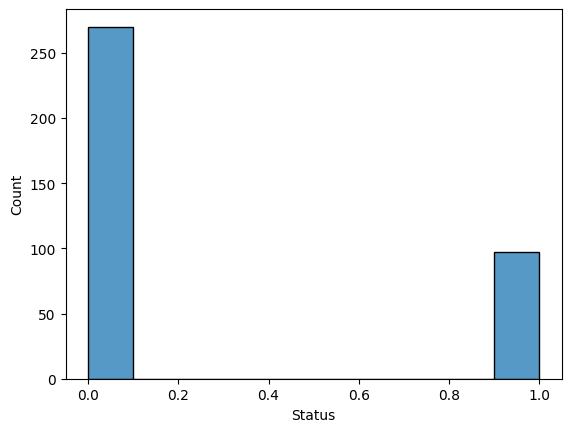

In [ ]:
sn.histplot(df['Status'])

<Axes: xlabel='Churn', ylabel='Count'>

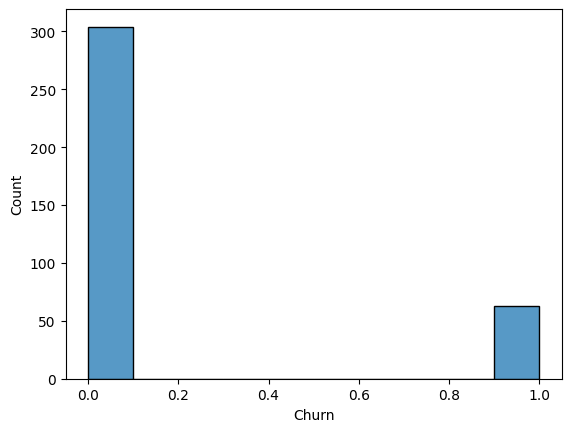

In [ ]:
sn.histplot(df['Churn'])

## Разделение на обучающую и тестовую выборки

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3)

## Кластеризация

In [ ]:
X = train_df.drop(columns=['Churn'])
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Визуализация кластеров

In [ ]:
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X)

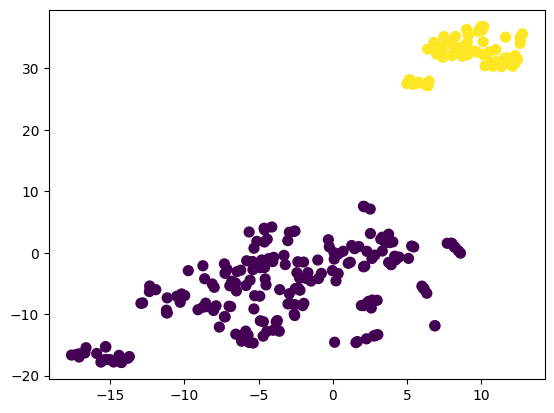

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.show()

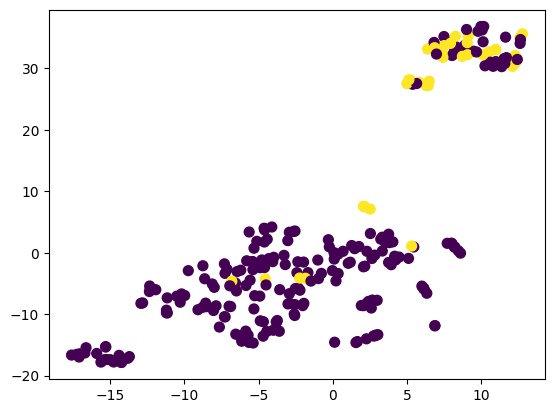

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_df['Churn'], s=50, cmap='viridis')
plt.show()

## Логистическая регрессия

In [ ]:
train_df['cluster'] = cluster_labels

In [ ]:
X = train_df.drop(columns=['Churn', 'cluster'])
y = train_df['cluster']

logistic_model = LogisticRegression()
logistic_model.fit(X, y)

X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

y_pred = logistic_model.predict(X_test)

## Метрики

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8108108108108109
Precision: 0.5526315789473685
Recall: 0.84


**Выводы**

---

Параметр **Accuracy** равен 81%, что показывает довольно высокий уровень точности предстазанных значений. Однако параметр **Precision** равен 55%, что в свою очередь является не самым лучшим резултатом для правильно предсказанных значений оттока клиентов. Тем временем параметр **Recall** равен 84%, что даёт понимание, что бОльшая часть оттока клиентов была предсказана верно.

Итого можно сделать вывод, что данная модель показывает достаточно хорошие результаты, но есть возможности для улучшения по параметру **Precision**.



**Предложения по развитию**

---

***Развертывание и мониторинг***

Можно подготовить модель для развертывания в производственной среде.
Разработайть систему мониторинга производительности модели.

Также можно будет постоянно отслеживать производительность модели и обновляйть её по мере необходимости.

***Оптимизация стратегий удержания***

Можно разработать персонализированные маркетинговые кампании для клиентов с высоким риском оттока, основанные на характеристиках каждого кластера.

Также можно разработать программы лояльности и предложения для клиентов с высоким риском оттока, чтобы повысить их удержание.
